# <center> <font color=blue> K-Means Implementation </font></center>
---

## <font color=blue> 01. Dependencies </font>
---

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import sklearn.metrics as sm 
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.datasets import load_iris

## <font color=blue>02. Loading Dataset </font>
---

In [2]:
iris_ds = load_iris()

## <font color=blue> 03. Exploring Dataset </font>
---

In [3]:
print(iris_ds.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
iris_df = pd.DataFrame(iris_ds.data)
iris_df.columns = pd.Series(iris_ds.feature_names).str.replace('\(|\)','')
iris_df.columns = iris_df.columns.str.replace(' ','_')
print(iris_df.columns.values)


['sepal_length_cm' 'sepal_width_cm' 'petal_length_cm' 'petal_width_cm']


In [5]:
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## <font color=blue> 04. Preprocessing Dataset </font>
---

In [7]:
# checking if dataset contains any missing value
print(iris_df.isna().sum())

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
dtype: int64


## <font color=blue> 05. Model Training/Building </font>
---

In [8]:
X = scale(iris_ds.data)                 # Feature Matrix
y = pd.DataFrame(iris_ds.target)        # Response vector
y.columns = ['Targets']

KM = KMeans(n_clusters=3,random_state=5)  # 3 Species in iris dataset
KM.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

### <center><font color=blue> Plotting the output of the model</font></center>
---

Text(0.5,1,'K-Means Classification')

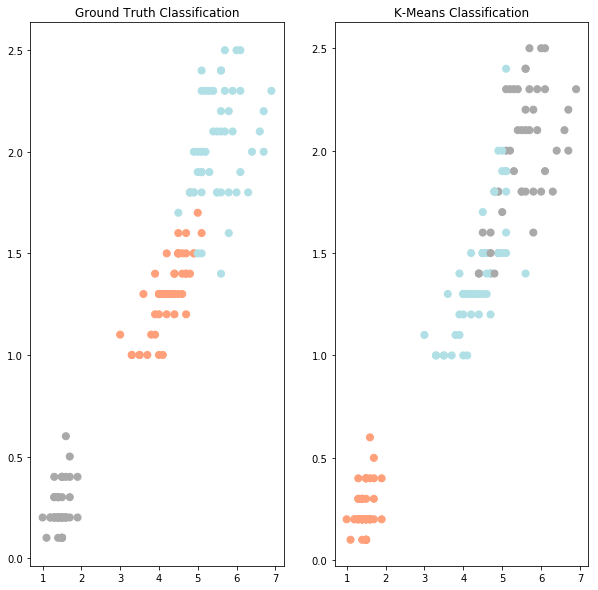

In [9]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length_cm,y=iris_df.petal_width_cm, c=color_theme[iris_ds.target], s=50)
plt.title("Ground Truth Classification")
plt.gcf().set_size_inches((10, 10)) 

plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length_cm,y=iris_df.petal_width_cm, c=color_theme[KM.labels_], s=50)
plt.title("K-Means Classification")


Text(0.5,1,'K-Means Classification')

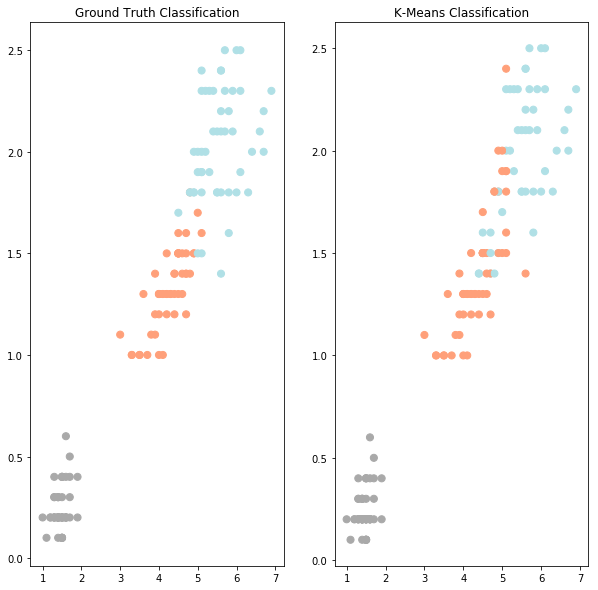

In [10]:
relabel = np.choose(KM.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length_cm,y=iris_df.petal_width_cm, c=color_theme[iris_ds.target], s=50)
plt.title("Ground Truth Classification")
plt.gcf().set_size_inches((10, 10)) 

plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length_cm,y=iris_df.petal_width_cm, c=color_theme[relabel], s=50)
plt.title("K-Means Classification")

## <font color=blue> 06. Model Evaluation

In [11]:
print(classification_report(y,relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



#### <center><font color = blue>Precision:</font> A measure of the model relevancy</center>



#### <center><font color=blue>Recall:</font>  A measure of the model completeness</center>

#### <center><font color=green> High Precision + High Recall = High Accurate Model </font></center>